In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

# Display the shape of the dataset
rows, cols = df.shape
print(f"The dataset has {rows} rows and {cols} columns.")


The dataset has 5268 rows and 13 columns.


In [2]:
df.tail(75)


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5193,03/15/2008,08:15,"Nbagu, Nigeria",Trade Wings Aviation Ltd.,NaN,Lagos - Bebi Air Strip,Beechcraft 1900D,5N-JAH,UE-322,3.0,3.0,0.0,The plane crashed while en route. Wreckage was...
5194,04/03/2008,11:00,"Lawa, Suriname",Blue Wing Airlines,NaN,Paramaribo - Lawa,Antonov An-28,PZ-TSO,1AJ007-17,19.0,19.0,0.0,While attempting to land the crew aborted the ...
5195,04/09/2008,23:27,"Bundeena, Australia",Avtex Air Services,NaN,Sydney - Brisbane,Swearingen SA227AC Metroliner III,VH-OZA,AC-600,1.0,1.0,0.0,The pilot of the mail plane reported some mino...
5196,04/11/2008,22:15,"Chrisinau, Moldova",Kata Transportation,NaN,"Chrisinau, Moldova - Antalya, Turkey - Sudan",Antonov An-32,ST-AZL,3009,8.0,8.0,0.0,Just minutes after the take off the plane trie...
5197,04/15/2008,14:30,"Goma, Congo",Hewa Bora Airways,NaN,Goma - Kisangani - Kinshasa,McDonnell Douglas DC-9-51,9Q-CHN,47731,85.0,0.0,47.0,"While attempting to takeoff, the plane failed ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [3]:

df.info()

"""
Possible treatments:
- 'Date': Drop rows with missing dates 
- 'Time': Fill missing times with mode or 'Unknown'
- 'Location': Fill missing with 'Unknown' 
- 'Operator': Fill missing with 'Unknown' 
Justifications:
- Median is robust to outliers.
- Categorical 'Unknown' maintains dataset length without distorting trends.
- Dropping dates ensures time-based analysis accuracy.
"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


"\nPossible treatments:\n- 'Date': Drop rows with missing dates \n- 'Time': Fill missing times with mode or 'Unknown'\n- 'Location': Fill missing with 'Unknown' \n- 'Operator': Fill missing with 'Unknown' \nJustifications:\n- Median is robust to outliers.\n- Categorical 'Unknown' maintains dataset length without distorting trends.\n- Dropping dates ensures time-based analysis accuracy.\n"

In [7]:
fatality_locations = df[['Date', 'Location', 'Aboard', 'Fatalities']].copy()
fatality_locations.head()


,Date,Location,Aboard,Fatalities
0,09/17/1908,"Fort Myer, Virginia",2.0,1.0
1,07/12/1912,"AtlantiCity, New Jersey",5.0,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,20.0,14.0
4,10/17/1913,"Near Johannisthal, Germany",30.0,30.0


In [8]:
max_fatal = fatality_locations['Fatalities'].max()
date_highest_fatal = fatality_locations.loc[fatality_locations['Fatalities'] == max_fatal, 'Date'].values[0]
print(f"The highest number of fatalities ({max_fatal}) occurred on {date_highest_fatal}.")


The highest number of fatalities (583.0) occurred on 03/27/1977.


In [9]:
fatality_locations['No_Fatalities'] = fatality_locations['Fatalities'] == 0

no_fatal_crashes = fatality_locations['No_Fatalities'].sum()
print(f"There were {no_fatal_crashes} crashes with zero fatalities.")

# Comparison of Aboard vs Fatalities
fatality_locations[['Aboard', 'Fatalities']].describe()


There were 58 crashes with zero fatalities.


,Aboard,Fatalities
count,5246.000000,5256.000000
mean,27.554518,20.068303
std,43.076711,33.199952
min,0.000000,0.000000
25%,5.000000,3.000000
50%,13.000000,9.000000
75%,30.000000,23.000000
max,644.000000,583.000000


In [10]:

location_split = fatality_locations['Location'].str.split(',', n=1, expand=True)
fatality_locations['Region'] = location_split[0]
fatality_locations['State/Country'] = location_split[1].str.strip()

fatality_locations[['Date', 'Region', 'State/Country', 'Aboard', 'Fatalities']].head()


,Date,Region,State/Country,Aboard,Fatalities
0,09/17/1908,Fort Myer,Virginia,2.0,1.0
1,07/12/1912,AtlantiCity,New Jersey,5.0,5.0
2,08/06/1913,Victoria,"British Columbia, Canada",1.0,1.0
3,09/09/1913,Over the North Sea,None,20.0,14.0
4,10/17/1913,Near Johannisthal,Germany,30.0,30.0


In [11]:
fatality_top100 = fatality_locations.sort_values(by='Fatalities', ascending=False).head(100)
fatality_top100.head()


,Date,Location,Aboard,Fatalities,No_Fatalities,Region,State/Country
2963,03/27/1977,"Tenerife, Canary Islands",644.0,583.0,False,Tenerife,Canary Islands
3568,08/12/1985,"Mt. Osutaka, near Ueno Village, Japan",524.0,520.0,False,Mt. Osutaka,"near Ueno Village, Japan"
4455,11/12/1996,"Near Charkhidadri, India",349.0,349.0,False,Near Charkhidadri,India
2726,03/03/1974,"Near Ermenonville, France",346.0,346.0,False,Near Ermenonville,France
3562,06/23/1985,"AtlantiOcean, 110 miles West of Ireland",329.0,329.0,False,AtlantiOcean,110 miles West of Ireland


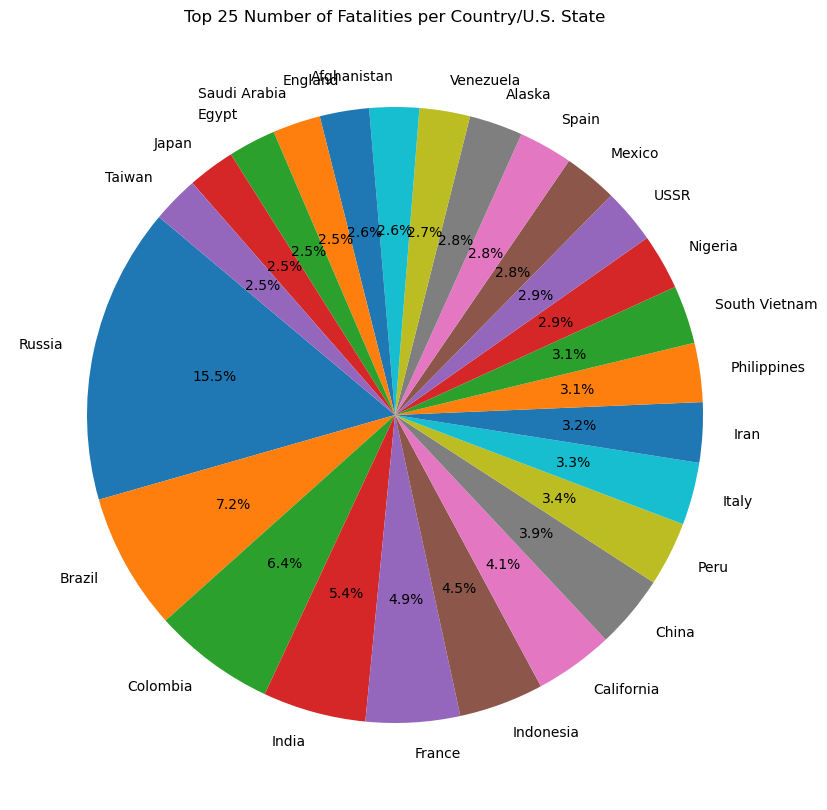

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by State/Country and sum fatalities
fatality_country = (fatality_locations.groupby('State/Country')['Fatalities']
                    .sum()
                    .sort_values(ascending=False)
                    .head(25))

# Pie chart
plt.figure(figsize=(10,10))
fatality_country.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Top 25 Number of Fatalities per Country/U.S. State')
plt.ylabel('')
plt.show()


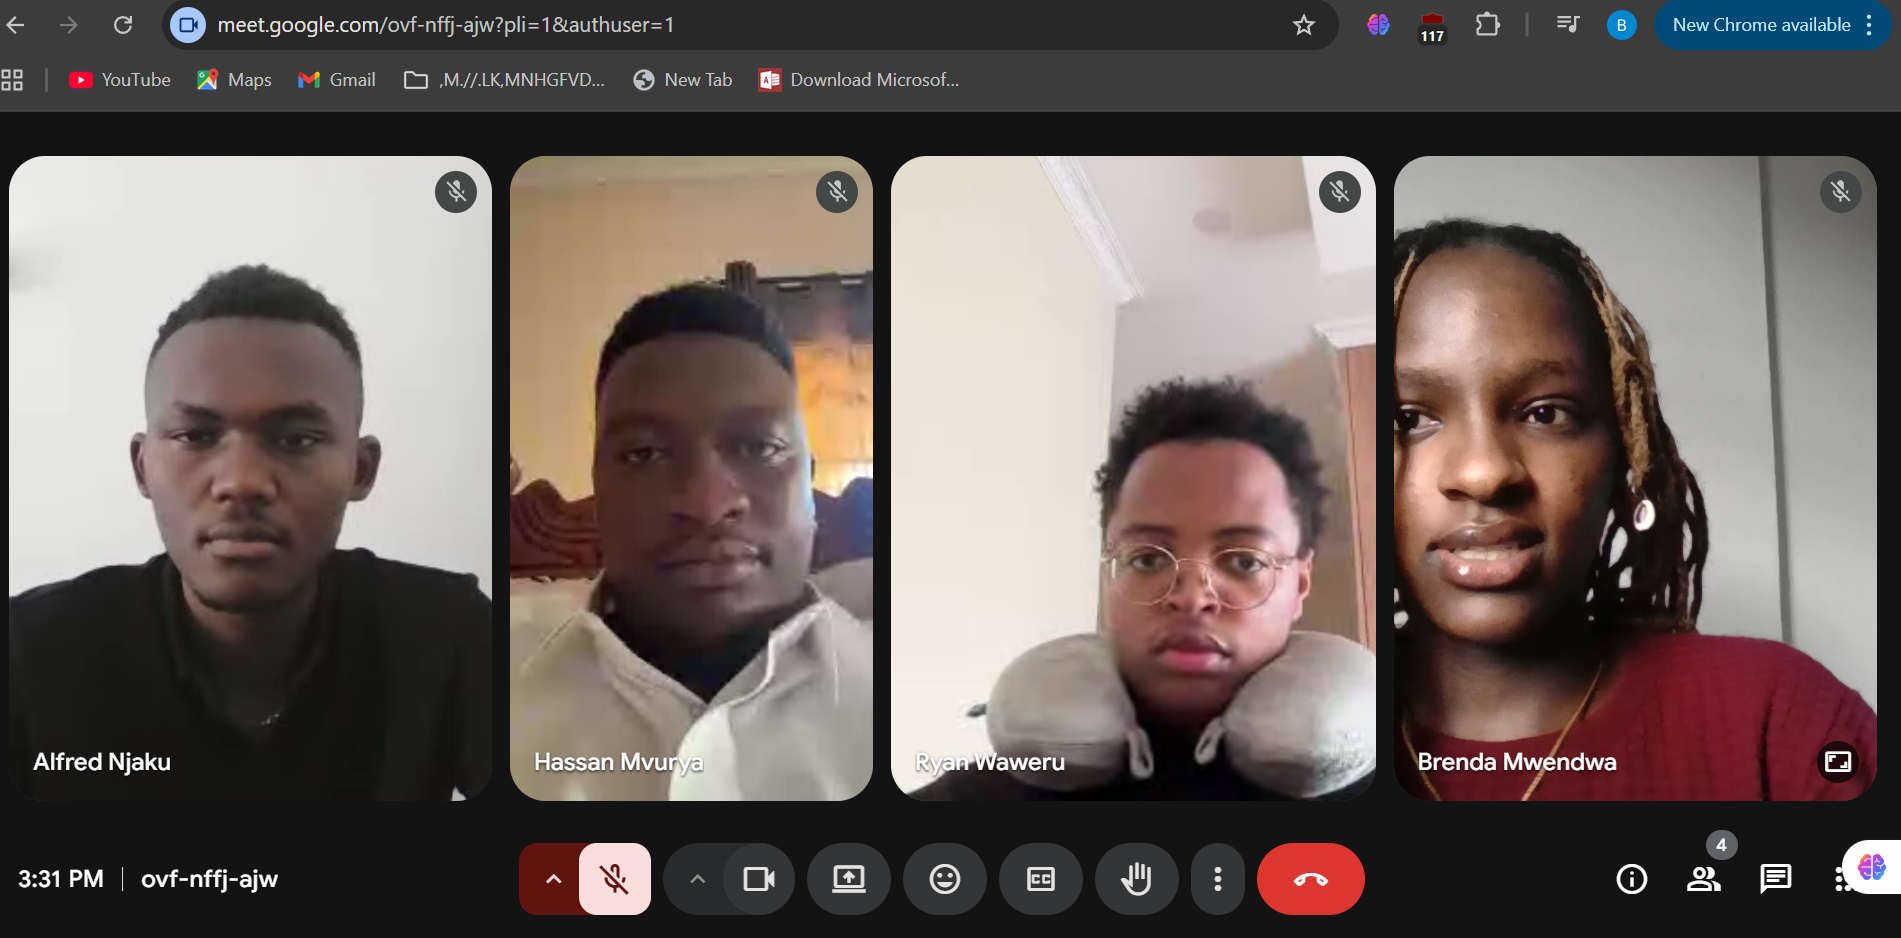